In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [38]:
df = pd.read_excel('250110_BMED_train data_v1.xlsx', sheet_name='Sheet2')
mean_T = df.groupby('exp')['T'].mean().reset_index()
df = df.merge(mean_T, on='exp', suffixes=('', '_mean'))
df['T'] = df['T_mean']
df = df.drop(columns=['T_mean'])

In [39]:
t = []
T = []
NF_LA = []
NF_K = []
VF = []
VA = []
VB = []
exp = []
V = []
E = []


for i in range(34):
    fla = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['NF_LA'], kind='linear')
    fk = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['NF_K'], kind='linear')
    fT = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['T'], kind='linear')
    fVF = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['VF'], kind='linear')
    fVA = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['VA'], kind='linear')
    fVB = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['VB'], kind='linear')
    tn = np.arange(0,df[df['exp']==i+1]['t'].iloc[-1],0.1)
    lan = fla(tn)
    kn = fk(tn)
    Tn = fT(tn)
    vfn = fVF(tn)
    van = fVA(tn)
    vbn = fVB(tn)
    t.append(tn)
    NF_LA.append(lan)
    NF_K.append(kn)
    T.append(Tn)
    VF.append(vfn)
    VA.append(van)
    VB.append(vbn)
    exp.append(np.ones(len(tn))*df[df['exp']==i+1]['exp'].iloc[0])
    V.append(np.ones(len(tn))*df[df['exp']==i+1]['V'].iloc[0])
    E.append(np.ones(len(tn))*df[df['exp']==i+1]['E'].iloc[0])


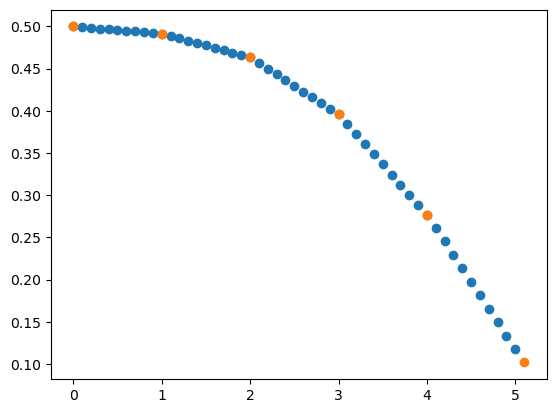

In [40]:
plt.scatter(t[0],NF_LA[0])
plt.scatter(df[df['exp']==1]['t'],df[df['exp']==1]['NF_LA'])

In [41]:
NA_LA = []
NB_K = []

for i in range(len(NF_LA)):
    nla = NF_LA[i][0] - NF_LA[i]
    nk = NF_K[i][0] - NF_K[i]
    NA_LA.append(nla)
    NB_K.append(nk)

In [42]:
dNLA = []
dNK = []
dVF = []
dVA = []
dVB = []

for i in range(len(NF_LA)):
    dnla = np.zeros(len(NF_LA[i]))
    dnk = np.zeros(len(NF_LA[i]))
    dvf = np.zeros(len(NF_LA[i]))
    dva = np.zeros(len(NF_LA[i]))
    dvb = np.zeros(len(NF_LA[i]))
    for j in range(len(NF_LA[i])):
        if j == len(NF_LA[i])-1:
            dnla[j] = dnla[j-1]
            dnk[j] = dnk[j-1]
            dvf[j] = dvf[j-1]
            dva[j] = dva[j-1]
            dvb[j] = dvb[j-1]
        else:
            dnla[j] = (NF_LA[i][j+1] - NF_LA[i][j])/(t[i][j+1] - t[i][j])
            dnk[j] = (NF_K[i][j+1] - NF_K[i][j])/(t[i][j+1] - t[i][j])
            dvf[j] = (VF[i][j+1] - VF[i][j])/(t[i][j+1] - t[i][j])
            dva[j] = (VA[i][j+1] - VA[i][j])/(t[i][j+1] - t[i][j])
            dvb[j] = (VB[i][j+1] - VB[i][j])/(t[i][j+1] - t[i][j])
    dNLA.append(dnla)
    dNK.append(dnk)
    dVF.append(dvf)
    dVA.append(dva)
    dVB.append(dvb)

In [43]:
dNLA

[array([-0.00834347, -0.00834347, -0.00834347, -0.00834347, -0.00834347,
        -0.00834347, -0.00834347, -0.00834347, -0.00834347, -0.00834347,
        -0.02829209, -0.02829209, -0.02829209, -0.02829209, -0.02829209,
        -0.02829209, -0.02829209, -0.02829209, -0.02829209, -0.02829209,
        -0.06758382, -0.06758382, -0.06758382, -0.06758382, -0.06758382,
        -0.06758382, -0.06758382, -0.06758382, -0.06758382, -0.06758382,
        -0.11869865, -0.11869865, -0.11869865, -0.11869865, -0.11869865,
        -0.11869865, -0.11869865, -0.11869865, -0.11869865, -0.11869865,
        -0.15936669, -0.15936669, -0.15936669, -0.15936669, -0.15936669,
        -0.15936669, -0.15936669, -0.15936669, -0.15936669, -0.15936669,
        -0.15936669]),
 array([ 0.00313688,  0.00313688,  0.00313688,  0.00313688,  0.00313688,
         0.00313688,  0.00313688,  0.00313688,  0.00313688,  0.00313688,
         0.00889523,  0.00889523,  0.00889523,  0.00889523,  0.00889523,
         0.00889523,  0.0088

In [44]:
nexp = []
nt = []
nT = []
nV = []
nE = []
nNF_LA = []
nNF_K = []
nNA_LA = []
nNB_K = []
nVF = [] 
nVA = []
nVB = []
ndNLA = []
ndNK = []
ndVF = []
ndVA = []
ndVB = []
for i in range(len(exp)):
    if i == 0:
        nexp = exp[i]
        nt = t[i]
        nT = T[i]
        nV = V[i]
        nE = E[i]
        nNF_LA = NF_LA[i]
        nNF_K = NF_K[i]
        nNA_LA = NA_LA[i]
        nNB_K = NB_K[i]
        nVF = VF[i]
        nVA = VA[i]
        nVB = VB[i]
        ndNLA = dNLA[i]
        ndNK = dNK[i]
        ndVF = dVF[i]
        ndVA = dVA[i]
        ndVB = dVB[i]
    else:
        nexp = np.concatenate((nexp,exp[i]))
        nt = np.concatenate((nt,t[i]))
        nT = np.concatenate((nT,T[i]))
        nV = np.concatenate((nV,V[i]))
        nE = np.concatenate((nE,E[i]))
        nNF_LA = np.concatenate((nNF_LA,NF_LA[i]))
        nNF_K = np.concatenate((nNF_K,NF_K[i]))
        nNA_LA = np.concatenate((nNA_LA,NA_LA[i]))
        nNB_K = np.concatenate((nNB_K,NB_K[i]))
        nVF = np.concatenate((nVF,VF[i]))
        nVA = np.concatenate((nVA,VA[i]))
        nVB = np.concatenate((nVB,VB[i]))
        ndNLA = np.concatenate((ndNLA,dNLA[i]))
        ndNK = np.concatenate((ndNK,dNK[i]))
        ndVF = np.concatenate((ndVF,dVF[i]))
        ndVA = np.concatenate((ndVA,dVA[i]))
        ndVB = np.concatenate((ndVB,dVB[i]))

In [45]:

nNF_K


array([1.        , 1.00123534, 1.00247068, ..., 0.01926501, 0.01387938,
       0.00849374], shape=(3171,))

In [46]:
ndf = pd.DataFrame({
    'exp':nexp,'t':nt,'T':nT,'V':nV,'E':nE,'NF_LA':nNF_LA,'NF_K':nNF_K,'NA_LA':nNA_LA,'NB_K':nNB_K,'VF':nVF,'VA':nVA,'VB':nVB,'dNLA':ndNLA,'dNK':ndNK,'dVF':ndVF,'dVA':ndVA,'dVB':ndVB
    })

In [47]:
ndf.to_excel('250117_BMED_train data_v4.xlsx')